In [ ]:
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved XGBoost model
xgb_model = joblib.load('Data/xgboost_model.pkl')

# Load test datasets
X_test = joblib.load('Data/X_test.pkl')
y_test = joblib.load('Data/y_test.pkl')

print(" Model and data loaded successfully!")

✅ Model and data loaded successfully!


✅ Feature names cleaned and aligned successfully!
🏁 Final Model Evaluation (XGBoost)

Accuracy: 0.9716

Confusion Matrix:
 [[18254    40]
 [  528  1172]]

Classification Report:
               precision    recall  f1-score   support

           0      0.972     0.998     0.985     18294
           1      0.967     0.689     0.805      1700

    accuracy                          0.972     19994
   macro avg      0.969     0.844     0.895     19994
weighted avg      0.971     0.972     0.969     19994



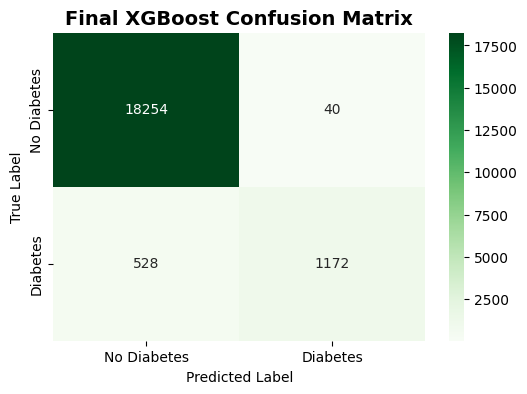

In [ ]:
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
expected_features = xgb_model.get_booster().feature_names
for col in expected_features:
    if col not in X_test.columns:
        X_test[col] = 0  
X_test = X_test[expected_features]

print(" Feature names cleaned and aligned successfully!")
y_pred_xgb = xgb_model.predict(X_test)
print(" Final Model Evaluation (XGBoost)\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
cm = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, digits=3))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Final XGBoost Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import pandas as pd

# Example input (replace with realistic values)
new_data = {
    'year': [2020],
    'gender_Female': [1],
    'gender_Male': [0],
    'age': [45],
    'location_Alabama': [1],
    'hypertension': [0],
    'heart_disease': [0],
    'smoking_history_never': [1],
    'bmi': [28.5],
    'hbA1c_level': [6.7],
    'blood_glucose_level': [145]
}
new_df = pd.DataFrame(new_data)
new_df = new_df.reindex(columns=X_test.columns, fill_value=0)
prediction = xgb_model.predict(new_df)[0]

print(" Model Prediction for New Patient:")
print("Diabetic" if prediction == 1 else "Non-Diabetic")

🩺 Model Prediction for New Patient:
Diabetic


In [ ]:
# Save predictions for the full test set
pred_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_xgb
})
pred_results.to_csv('Data/final_xgb_predictions.csv', index=False)
print(" Predictions saved to 'data/final_xgb_predictions.csv'")

📄 Predictions saved to 'data/final_xgb_predictions.csv'


In [ ]:
# Export model for web deployment
joblib.dump(xgb_model, 'model/final_xgboost_diabetes_model.pkl')
print(" Final model exported successfully for deployment!")

🚀 Final model exported successfully for deployment!
